In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('Sport car price.csv')

In [3]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
df.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

In [5]:
df['Car Model'].nunique()

176

In [6]:
df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

**Label Encoding the Car Make and dropping Car Model as we don't need it**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['Car Make'] = le.fit_transform(df['Car Make'])

In [9]:
df.drop(columns='Car Model',axis=1,inplace=True)

In [10]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3,379,331,4,"101,200"
1,16,2021,5.2,630,443,2.8,"274,390"
2,11,2022,3.9,661,561,3,"333,750"
3,5,2022,5.2,562,406,3.2,"142,700"
4,21,2021,4,710,568,2.7,"298,000"


In [11]:
df['Price (in USD)']=df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)']=df['Price (in USD)'].astype(int)

In [12]:
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df['Torque (lb-ft)'] = pd.to_numeric(df['Torque (lb-ft)'], errors='coerce')
#df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

In [13]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.0,379.0,331.0,4.0,101200
1,16,2021,5.2,630.0,443.0,2.8,274390
2,11,2022,3.9,661.0,561.0,3.0,333750
3,5,2022,5.2,562.0,406.0,3.2,142700
4,21,2021,4.0,710.0,568.0,2.7,298000


**Filling NaN values with mean of that column**

In [14]:
df.fillna(df.mean(skipna=True),inplace=True)

In [15]:
df

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.000000,379.0,331.0,4.00,101200
1,16,2021,5.200000,630.0,443.0,2.80,274390
2,11,2022,3.900000,661.0,561.0,3.00,333750
3,5,2022,5.200000,562.0,406.0,3.20,142700
4,21,2021,4.000000,710.0,568.0,2.70,298000
...,...,...,...,...,...,...,...
1002,15,2022,5.000000,1280.0,1106.0,2.50,3000000
1003,18,2021,4.395781,1972.0,1254.0,2.00,2000000
1004,21,2021,4.000000,789.0,590.0,2.70,1000000
1005,25,2021,6.000000,764.0,738.0,3.00,2600000


**Converting the data type of columns to integer**

In [16]:
df['Engine Size (L)']=df['Engine Size (L)'].astype(int)
df['Horsepower']=df['Horsepower'].astype(int)
df['Torque (lb-ft)']=df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)']=df['0-60 MPH Time (seconds)'].astype(int)

In [17]:
df.dtypes

Car Make                   int32
Year                       int64
Engine Size (L)            int32
Horsepower                 int32
Torque (lb-ft)             int32
0-60 MPH Time (seconds)    int32
Price (in USD)             int32
dtype: object

In [18]:
df.describe()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,15.246276,2021.201589,4.123138,627.321748,542.183714,3.013903,3.820359e+05
std,8.758008,2.019802,1.420781,298.628961,241.543169,0.873628,7.383227e+05
min,0.000000,1965.000000,0.000000,181.000000,0.000000,1.000000,2.500000e+04
25%,8.000000,2021.000000,3.000000,454.000000,406.000000,2.000000,7.180000e+04
50%,15.000000,2021.000000,4.000000,591.000000,509.000000,3.000000,1.400000e+05
75%,22.500000,2022.000000,5.000000,671.000000,602.000000,4.000000,2.500000e+05
max,37.000000,2023.000000,8.000000,2000.000000,1732.000000,6.000000,5.200000e+06


**Creating a new feature i.e. Age of the car**

In [19]:
import datetime
yr = datetime.datetime.now().year

In [20]:
df['Age'] = yr - df['Year']

In [21]:
df.describe()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Age
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.000000
mean,15.246276,2021.201589,4.123138,627.321748,542.183714,3.013903,3.820359e+05,1.798411
std,8.758008,2.019802,1.420781,298.628961,241.543169,0.873628,7.383227e+05,2.019802
min,0.000000,1965.000000,0.000000,181.000000,0.000000,1.000000,2.500000e+04,0.000000
25%,8.000000,2021.000000,3.000000,454.000000,406.000000,2.000000,7.180000e+04,1.000000
50%,15.000000,2021.000000,4.000000,591.000000,509.000000,3.000000,1.400000e+05,2.000000
75%,22.500000,2022.000000,5.000000,671.000000,602.000000,4.000000,2.500000e+05,2.000000
max,37.000000,2023.000000,8.000000,2000.000000,1732.000000,6.000000,5.200000e+06,58.000000


In [22]:
df.columns

Index(['Car Make', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
       '0-60 MPH Time (seconds)', 'Price (in USD)', 'Age'],
      dtype='object')

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

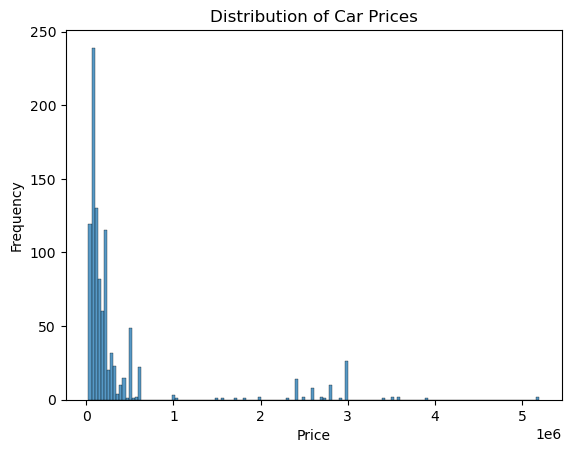

In [24]:
sns.histplot(data=df,x='Price (in USD)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

In [25]:
numeric_cols = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)', 'Age']

In [26]:
corr_mat = df[numeric_cols].corr()

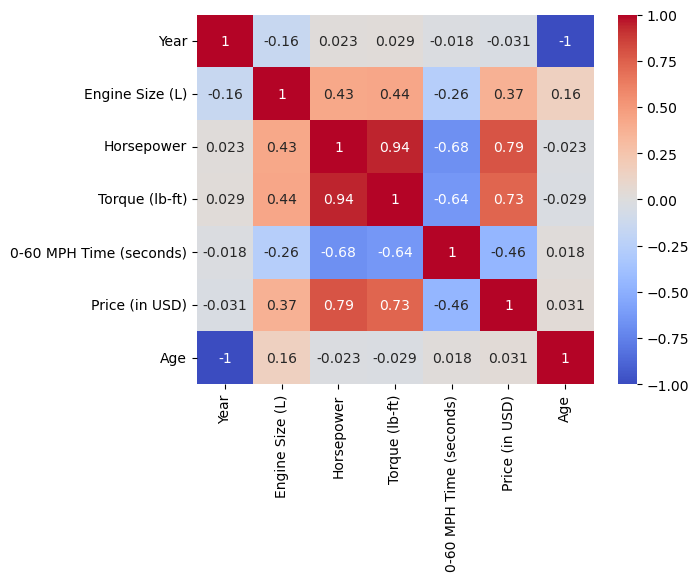

In [27]:
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.show()

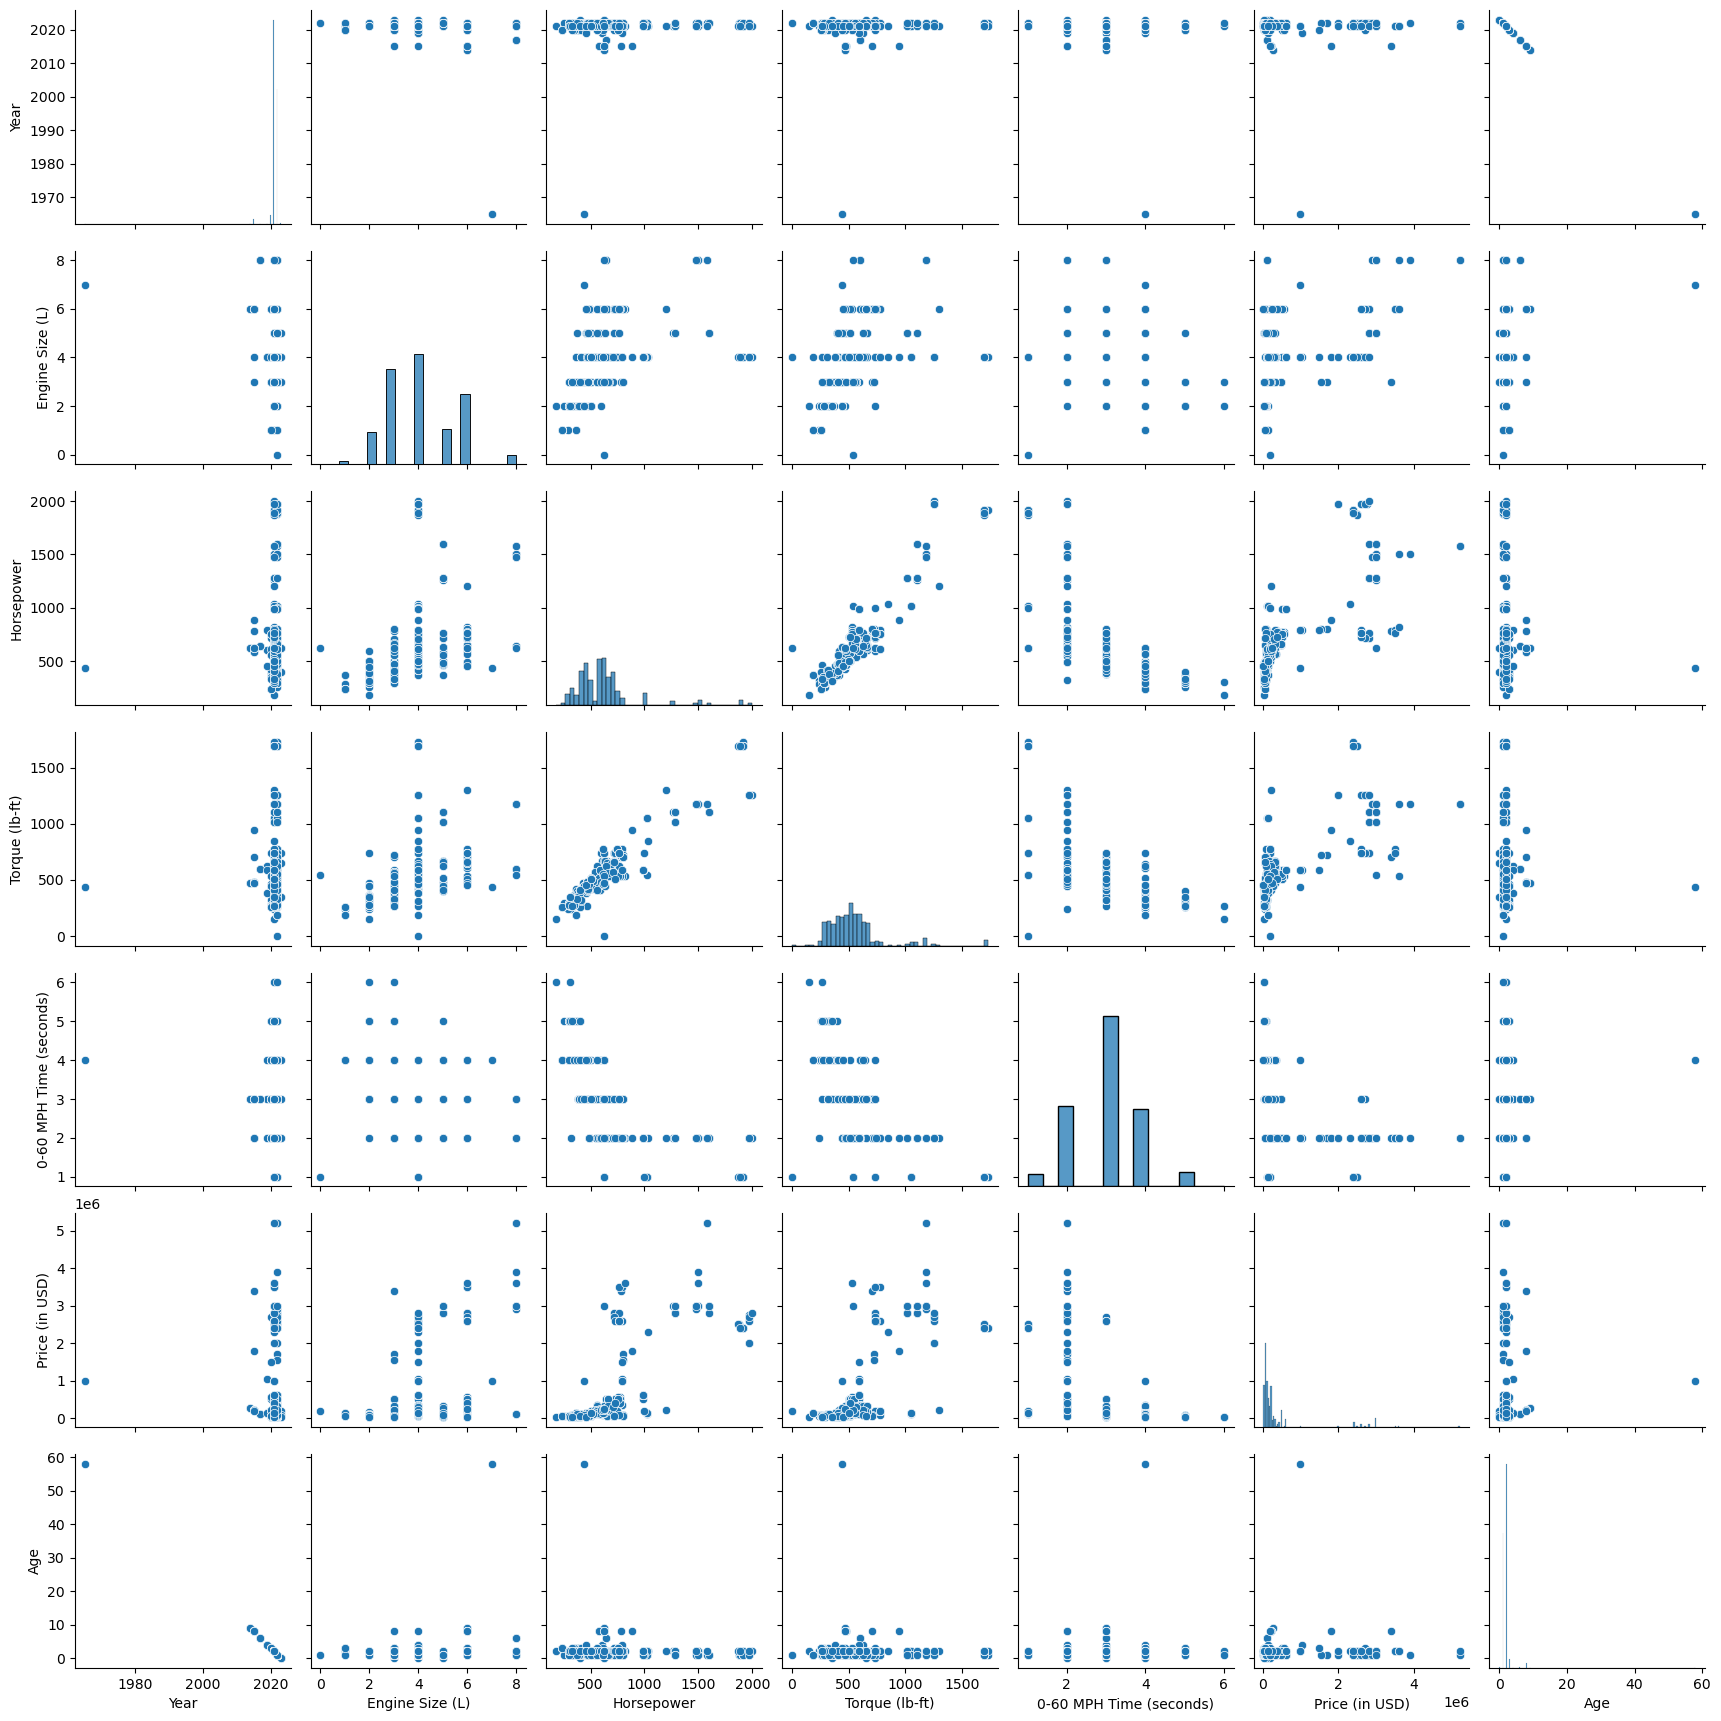

In [28]:
sns.pairplot(df[numeric_cols])

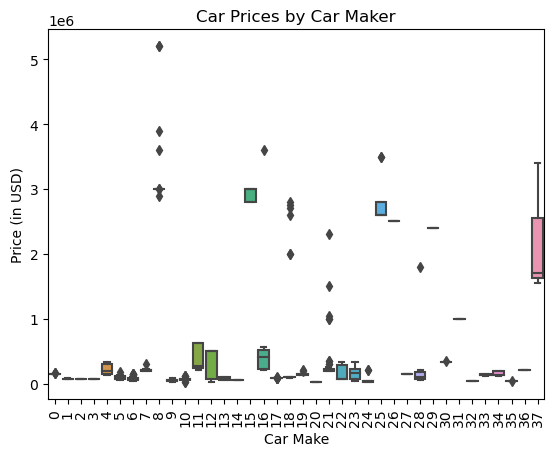

In [29]:
sns.boxplot(data=df, x='Car Make', y='Price (in USD)')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Price (in USD)')
plt.title('Car Prices by Car Maker')
plt.show()

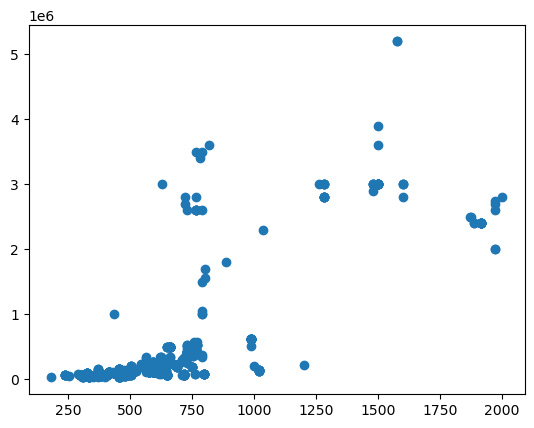

In [30]:
plt.scatter(df['Horsepower'], df['Price (in USD)'])

**Linear Regression Algorithm**

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Price (in USD)',axis=1)

In [32]:
y=df['Price (in USD)']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [35]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5906905608619115


**Decision Tree Algorithm**

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)


In [38]:
X = df[['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Age']]
y = df['Price (in USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Create an instance of the Decision Tree Regressor
dec_model = DecisionTreeRegressor()

# Fit the model to the training data
dec_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dec_model.predict(X_test)
print(y_pred)
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

[  76341.66666667  136367.5          63716.66666667  114342.33333333
  140671.           71490.          145948.           77268.75
  118500.         3400000.         2400000.          500000.
  195362.5         112363.63636364   59053.07692308  461271.14285714
  625000.           59900.          105000.          275000.
   76287.5         101652.5          46200.          185000.
  595500.          112363.63636364   76595.          101652.5
  431859.66666667   52500.          195362.5         170595.
  595500.          210000.           66166.66666667  332666.66666667
 2300000.           76287.5         218125.          158070.
 2999500.          332666.66666667  204550.           52500.
  306998.75         93838.88888889  101652.5         595500.
   59053.07692308  306125.           28000.           46200.
  274734.          211422.5          71800.          209487.5
  161500.           30795.          274734.          219234.46153846
   59900.           62925.           30795.      

**Cross Validation**

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Split the data into training and test sets
X = df[['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Age']]
y = df['Price (in USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

# Create an instance of the Decision Tree Regressor
model = DecisionTreeRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"R-squared: {r2}")


Best Parameters: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2}
R-squared: 0.8189725474943436


In [40]:
tree_r2 = r2_score(y_test,y_pred_tree)

In [41]:
print(f"R-squared: {r2}")

R-squared: 0.8189725474943436


In [42]:
X.head(1)

,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Age
0,3,379,331,4,1


In [43]:
y

0        101200
1        274390
2        333750
3        142700
4        298000
         ...   
1002    3000000
1003    2000000
1004    1000000
1005    2600000
1006    2400000
Name: Price (in USD), Length: 1007, dtype: int32

In [44]:
dec_model.predict([[3,379,331,4,1]])

C:\Users\dg700\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([101200.])

**Decision Tree algorithm has a way better accuracy than linear regression for the above problem**

In [45]:
import pickle
pickle.dump(dec_model, open('model33.pkl', 'wb'))